# Skills Count
## What are the most demanded skills for the top 3 most popular data roles ?
### Methodology
1) Clean-up skill column
2) Calculate skill count based on job_title_short
3) Calculate skill percentage
4) Plot final findings

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
df = pd.read_csv('data_jobs_dataset.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'],dayfirst=True)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df.head()

,Unnamed: 0,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:00,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:00,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:00,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:00,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:00,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:
df.isnull().sum()

Unnamed: 0                    0
job_title_short               0
job_title                     1
job_location               1045
job_via                       8
job_schedule_type         12667
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                   0
salary_rate              752674
salary_year_avg          763738
salary_hour_avg          775079
company_name                 18
job_skills               117037
job_type_skills          117037
dtype: int64

In [4]:
df.drop(columns=['job_location','job_via','salary_rate','salary_hour_avg'],inplace=True)

In [5]:
df.columns

Index(['Unnamed: 0', 'job_title_short', 'job_title', 'job_schedule_type',
       'job_work_from_home', 'search_location', 'job_posted_date',
       'job_no_degree_mention', 'job_health_insurance', 'job_country',
       'salary_year_avg', 'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0                    0
job_title_short               0
job_title                     1
job_schedule_type         12667
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                   0
salary_year_avg          763738
company_name                 18
job_skills               117037
job_type_skills          117037
dtype: int64

In [7]:
df_skills = df.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,NaN
1,Data Analyst,r
1,Data Analyst,python
1,Data Analyst,sql
1,Data Analyst,nosql
...,...,...
785739,"Principal Associate, Data Engineer (Remote-Eli...",kafka
785739,"Principal Associate, Data Engineer (Remote-Eli...",kubernetes
785739,"Principal Associate, Data Engineer (Remote-Eli...",docker
785740,AWS System Analyst,aws


In [8]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [9]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [10]:
df_job_title_count = df['job_title_short'].value_counts().reset_index(name='jobs_total')

In [11]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skill_percent'] = 100 * (df_skills_perc['skill_count'] / df_skills_perc['jobs_total'])
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,113711,172286,66.001300
1,sql,Data Engineer,113130,186241,60.743875
2,python,Data Engineer,108022,186241,58.001192
3,sql,Data Analyst,92428,196075,47.139105
4,sql,Data Scientist,78982,172286,45.843539
...,...,...,...,...,...
2251,webex,Senior Data Scientist,1,36957,0.002706
2252,mattermost,Data Scientist,1,172286,0.000580
2253,clickup,Machine Learning Engineer,1,14080,0.007102
2254,heroku,Senior Data Analyst,1,29216,0.003423


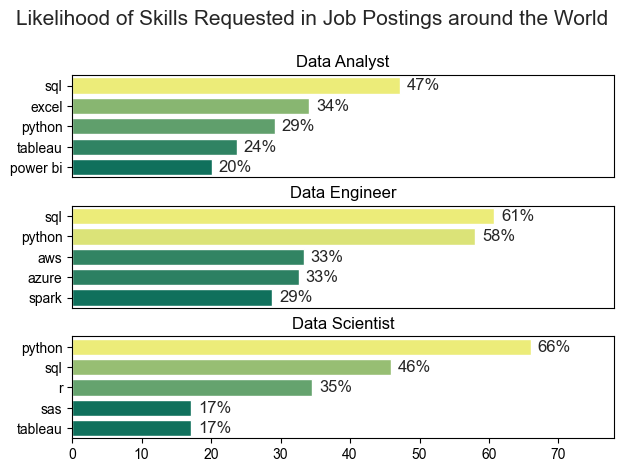

In [12]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count',palette='summer')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)

    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
fig.suptitle('Likelihood of Skills Requested in Job Postings around the World', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()